In [1]:
from scripts.symbolic.symb import sample_points
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
from omegaconf import omegaconf
from flax import serialization
import hydra

In [2]:
cfg = omegaconf.OmegaConf.load('conf/k3.yaml')

variety = hydra.utils.instantiate(cfg.variety)
cfg.algebraic_metric.sections.dim_proj = variety.dim_projective

metric = hydra.utils.instantiate(cfg.algebraic_metric)
cfg.network.basis_size = metric.sections.size
model = hydra.utils.instantiate(cfg.network)

In [3]:
# with open('outputs/2023-02-28/07-42-39/final.params', 'rb') as file:
with open('outputs/2023-03-01/07-45-54/final.params.2', 'rb') as file:
# with open('outputs/2023-03-03/19-10-51/final.params', 'rb') as file:
    params = serialization.from_bytes(model, file.read())
params

{'params': {'Dense_0': {'bias': array([-0.00219593, -0.00233192, -0.00185932, ..., -0.00089341,
           0.00989999,  0.0032944 ], dtype=float32),
   'kernel': array([[ 0.91322  , -0.8433481, -0.0771115, ..., -1.1609813, -2.1458988,
            1.1337371]], dtype=float32)},
  'Dense_1': {'bias': array([ 0.01153743, -0.008506  ,  0.00459755, ..., -0.00686836,
           0.00970994,  0.002289  ], dtype=float32),
   'kernel': array([[ 0.05743136,  0.03834065,  0.04955509, ..., -0.02063044,
           -0.04101812, -0.02770267],
          [ 0.01925424, -0.01497332, -0.01717776, ...,  0.01008511,
           -0.00978837, -0.04291071],
          [-0.00632463, -0.03902496, -0.00513559, ...,  0.00999134,
            0.03646516,  0.01616073],
          ...,
          [-0.00129623,  0.04331877,  0.0064297 , ..., -0.00829966,
           -0.03350772,  0.0219905 ],
          [ 0.02055095, -0.01682228,  0.00034042, ..., -0.06070099,
            0.02424247,  0.03822506],
          [ 0.03562564, -0.01

In [6]:
zs, g, ricci = sample_points(model, metric, params, dim=3, threshold=1e-3, count=10000, batch=10000)

Found 269 of 10000
Found 531 of 10000
Found 807 of 10000
Found 1060 of 10000
Found 1325 of 10000
Found 1593 of 10000
Found 1871 of 10000
Found 2155 of 10000
Found 2422 of 10000
Found 2698 of 10000
Found 2981 of 10000
Found 3241 of 10000
Found 3531 of 10000
Found 3799 of 10000
Found 4126 of 10000
Found 4414 of 10000
Found 4705 of 10000
Found 5018 of 10000
Found 5292 of 10000
Found 5567 of 10000
Found 5854 of 10000
Found 6133 of 10000
Found 6398 of 10000
Found 6674 of 10000
Found 6922 of 10000
Found 7168 of 10000
Found 7437 of 10000
Found 7710 of 10000
Found 7991 of 10000
Found 8282 of 10000
Found 8573 of 10000
Found 8866 of 10000
Found 9147 of 10000
Found 9421 of 10000
Found 9711 of 10000
Found 9981 of 10000
Found 10264 of 10000


In [ ]:
np.savez('k3_samples_limited.npz', zs=zs, g=g, ricci=ricci)

In [4]:
with open('k3_samples_huge.npz', 'rb') as file:
    data = np.load(file)
    zs = data['zs']
    g = data['g']
    ricci = data['ricci']

In [5]:
tr_g = jnp.trace(g, axis1=-1, axis2=-2).real
tr_g

Array([0.26197273, 0.23174101, 0.36997682, ..., 0.20588848, 0.2065362 ,
       0.27713066], dtype=float32)

In [6]:
det_g = jnp.linalg.det(g).real
det_g

Array([0.01634178, 0.0126454 , 0.02706479, ..., 0.01059463, 0.01065005,
       0.01701106], dtype=float32)

In [7]:
eig_g = jnp.linalg.eigh(g)[0]
eig_g

Array([[0.10242692, 0.15954578],
       [0.08793174, 0.14380927],
       [0.10039572, 0.26958105],
       ...,
       [0.10124613, 0.10464234],
       [0.09949273, 0.10704351],
       [0.09177542, 0.18535519]], dtype=float32)

In [8]:
jnp.mean(ricci.real)

Array(-8.0919233e-07, dtype=float32)

In [9]:
jnp.std(ricci.real)

Array(0.00057539, dtype=float32)

In [10]:
log_ric = jnp.log10(jnp.abs(ricci))
log_ric

Array([-3.3860066, -3.2939308, -3.2342422, ..., -3.2737794, -3.0092456,
       -3.2648351], dtype=float32)

In [11]:
z_norm = jnp.array([jnp.abs(zs[:,i]) for i in range(3)]).transpose()

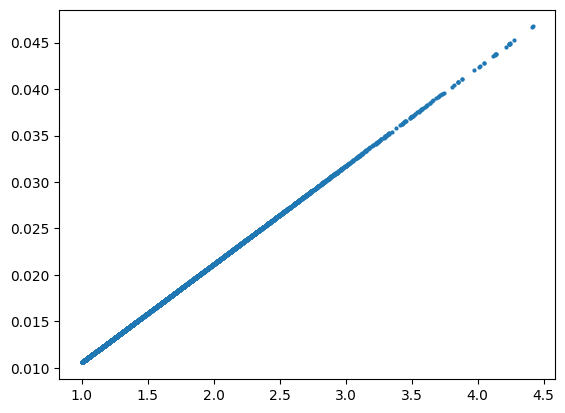

In [12]:
plt.scatter(1 / z_norm[:,0]**6, det_g, s=4)

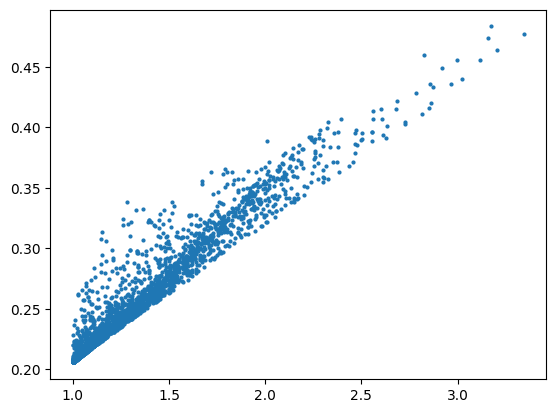

In [13]:
plt.scatter(1/z_norm[:,0] ** 5, tr_g, s=4)

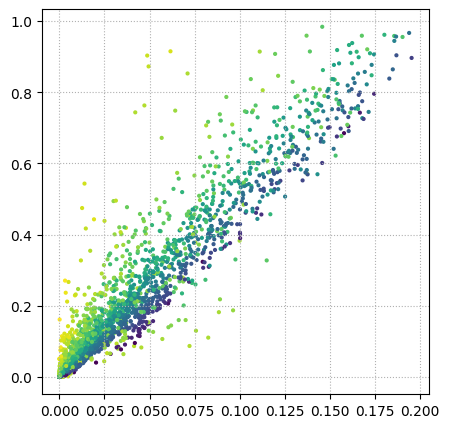

In [51]:
plt.figure(figsize=(5,5))
plt.grid(linestyle=':')

x1 = zs[:,1].real
x4 = zs[:,1].imag
x6 = z_norm[:,0]
x7 = z_norm[:,1]
x8 = z_norm[:,2]

plt.scatter((zs[:,1]**2).imag**2 * (0.25 - (x8-x6**3)*x6*(0.772-x7)) * (x6**(-4)-x6*x8),
            ((zs[:,1] / zs[:,0]) ** 2).real ** 2,
            c=z_norm[:,2], s=4)
pass

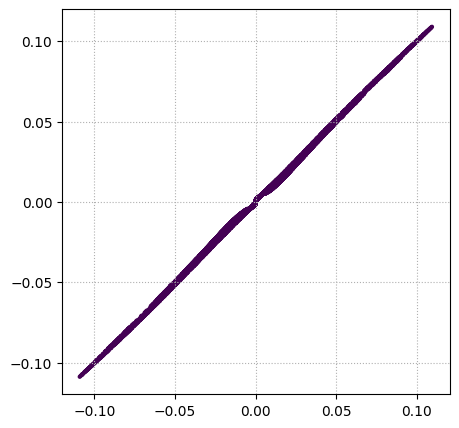

In [38]:
plt.figure(figsize=(5,5))
plt.grid(linestyle=':')
x4 = jnp.abs(zs)[:,1]
x5 = jnp.abs(zs)[:,2]
x6 = (zs[:,1] * zs[:,2]).real
x8 = (zs[:, 1] * jnp.conj(zs[:, 2])).real

plt.scatter(((((((x6 * 1/(x8))) * x6) + (x8 * ((x4) * x4))) * -0.051611226) * x4),
            g[:,0,1].real,
            c=z_norm[:,0], s=4)
pass

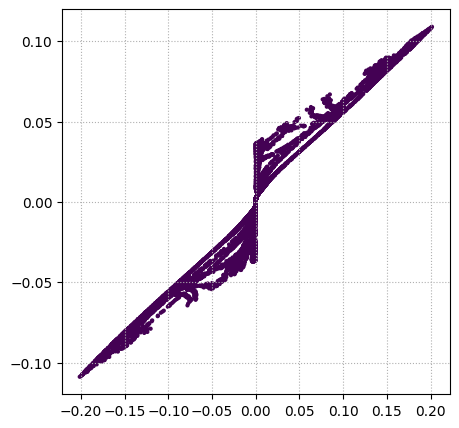

In [18]:
plt.figure(figsize=(5,5))
plt.grid(linestyle=':')
x6 = jnp.abs(zs)[:,0]
x9 = (zs[:,1] * zs[:,2]).real
x12 = (zs[:, 1] * jnp.conj(zs[:, 2])).real
x14 = jnp.abs(zs[:, 1] * jnp.conj(zs[:, 2]))
plt.scatter(1/4 * (1 - z_norm[:,0]**2) * x12**3
            - x12*x9**2/z_norm[:,0]**3/(1+5*x12**2),
    # (x9**2/((x12**2 * -7.6128087 - x6 - x14) * x6**3) - 0.5 * (x6 - 1 / x6) * x12**2) * x12,
            g[:,0,1].real, c=z_norm[:,0], s=4)
pass

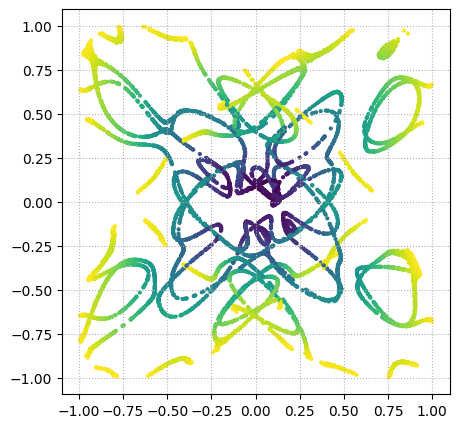

In [21]:
plt.figure(figsize=(5,5))
plt.grid(linestyle=':')
filter = z_norm[:,0] > 0.999
x11 = jnp.abs(zs[:,1] * zs[:,2])
plt.scatter((zs[filter,1]).real ,
            (zs[filter,2]).real , c=z_norm[filter,2], s=4)
pass

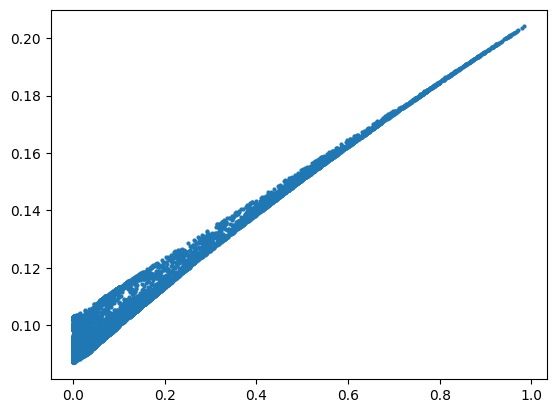

In [100]:
plt.scatter((1j * zs[:,1]**2).real**2, g[:,0,0].real,  s=4)
pass

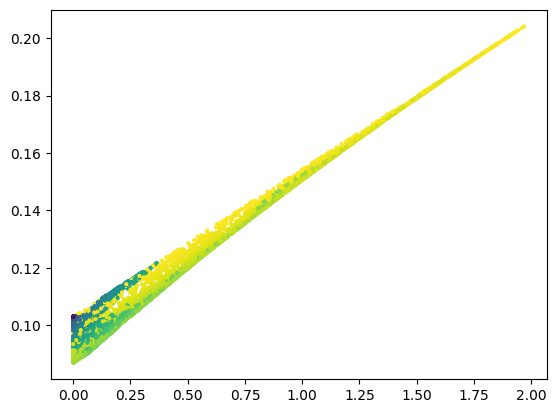

In [22]:
plt.scatter(jnp.real((zs[:,1]/zs[:,0])**4) + (z_norm[:,1] / z_norm[:,0]) ** 4,
        g[:,0,0].real, c=z_norm[:,2], s=4)
pass

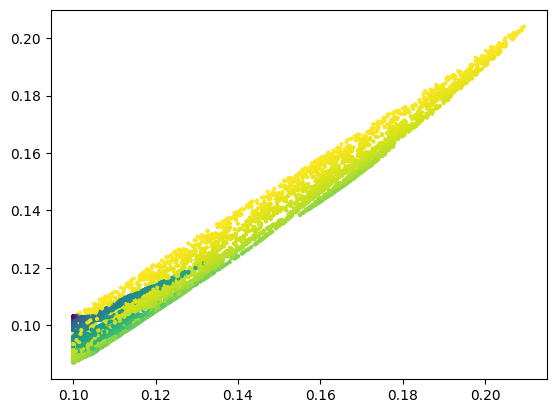

In [23]:
ratio = ((zs[:,1] / zs[:,0]) ** 2).real ** 2
x = ratio * (2 - z_norm[:,2]**2) / 9 + 0.1

plt.scatter(x, g[:,0,0].real, c=z_norm[:,2], s=4)
pass

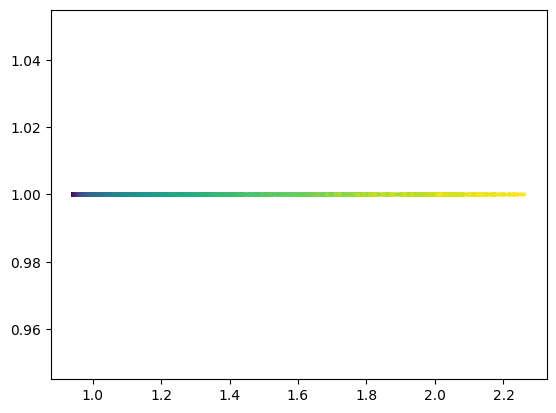

In [25]:
plt.scatter((((zs[:,1] / zs[:,0]) ** 2).real ** 2 * (2 - z_norm[:,2]**2) / 9 + 0.1) *
            (((zs[:,2] / zs[:,0]) ** 2).real ** 2 * (2 - z_norm[:,1]**2) / 9 + 0.1) * 94.3,
            z_norm[:,0]**(-6), c=z_norm[:,2], s=4)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(8,3.3))

common_params = {'c': g[:,0,1].real, 's': 4, 'cmap':'magma'}

# REAL
ax1.scatter((zs[:,1]*jnp.conj(zs[:,2])).real,  g[:,0,1].real, **common_params)
ax1.set_title("$\\Re(z_1 \\overline{z_2})$ vs $\\Re(g_{12})$")
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.grid(linestyle=':')

# IMAG
ax2.scatter((zs[:,1]*jnp.conj(zs[:,2])).imag, g[:,0,1].real, **common_params)
ax2.set_title("$\\Im(z_1 \\overline{z_2})$ vs $\\Re(g_{12})$")
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.grid(linestyle=':')

# TOP-DOWN
ax3.scatter((zs[:,1]*jnp.conj(zs[:,2])).real, (zs[:,1]*jnp.conj(zs[:,2])).imag, **common_params)
ax3.set_title("$\\Re(z_1 \\overline{z_2})$ vs $\\Im(z_1 \\overline{z_2})$")
ax3.set_yticklabels([])
ax3.set_xticklabels([])
ax3.grid(linestyle=':')

fig.tight_layout()
fig.savefig('graphics/g12_cubic.png', dpi=400)
pass

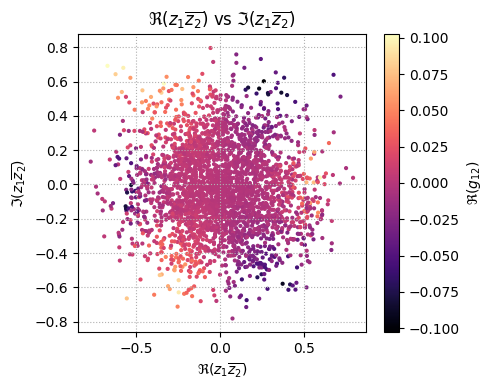

In [22]:
fig, ax3 = plt.subplots(1,1,figsize=(5,4))

# TOP-DOWN
pos = ax3.scatter((zs[:,1]*jnp.conj(zs[:,2])).real, (zs[:,1]*jnp.conj(zs[:,2])).imag, **common_params)
ax3.set_title("$\\Re(z_1 \\overline{z_2})$ vs $\\Im(z_1 \\overline{z_2})$")
ax3.set_xlabel("$\\Re(z_1 \\overline{z_2})$")
ax3.set_ylabel("$\\Im(z_1 \\overline{z_2})$")
ax3.grid(linestyle=':')

cbar = fig.colorbar(pos)
cbar.set_label("$\\Re(g_{12})$")

fig.tight_layout()
fig.savefig('graphics/g12_cubic_top_down.png', dpi=400)

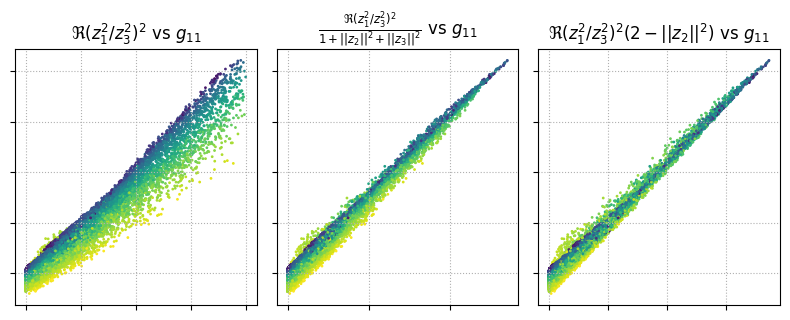

In [118]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(8,3.3))

ax1.scatter(((zs[:,1] / zs[:,0]) ** 2).real ** 2,
            g[:,0,0].real, c=z_norm[:,2], s=1)
ax1.set_title("$\\Re(z_1^2/z_3^2)^2$ vs $g_{11}$")
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.grid(linestyle=':')

ax2.scatter(((zs[:, 1] / zs[:, 0]) ** 2).real ** 2 / (1 + z_norm[:,2]**2 + z_norm[:,0]**2),
            g[:,0,0].real, c=z_norm[:,2], s=1)
ax2.set_title("$\\frac{\\Re(z_1^2/z_3^2)^2}{1 + ||z_2||^2 + ||z_3||^2}$ vs $g_{11}$")
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.grid(linestyle=':')


ax3.scatter(((zs[:,1] / zs[:,0]) ** 2).real ** 2 * (2 - z_norm[:,2]**2),
            g[:,0,0].real, c=z_norm[:,2], s=1)
ax3.set_title("$\\Re(z_1^2/z_3^2)^2 (2-||z_2||^2)$ vs $g_{11}$")
ax3.set_yticklabels([])
ax3.set_xticklabels([])
ax3.grid(linestyle=':')

fig.tight_layout()
fig.savefig('graphics/z2_dep.png', dpi=400)
pass

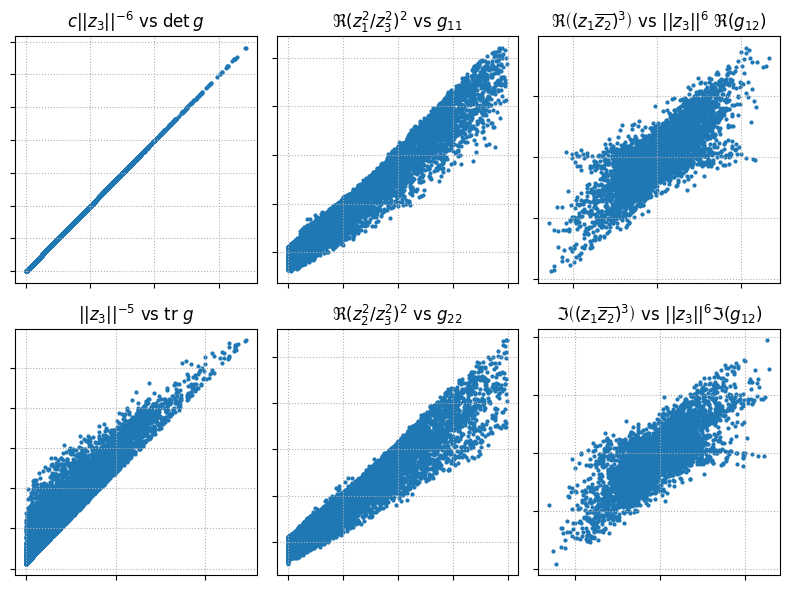

In [14]:
from scipy.stats import pearsonr

fig, axs = plt.subplots(2,3,figsize=(8,6))

# DETERMINANT
axs[0][0].scatter(1 / z_norm[:,0]**6, 94.3*det_g, s=4)
axs[0][0].set_title("$c||z_3||^{-6}$ vs $\\det g$") # f"\nR={pearsonr(1 / z_norm[:,0]**6, det_g)[0]:.3f}")
# axs[0][0].set_xlabel("$c||z_3||^{-6}$")
# axs[0][0].set_ylabel("$\\det g$")
axs[0][0].set_yticklabels([])
axs[0][0].set_xticklabels([])
axs[0][0].grid(linestyle=':')

# TRACE
axs[1][0].scatter(1/z_norm[:,0] ** 5, tr_g, s=4)
axs[1][0].set_title("$||z_3||^{-5}$ vs tr $g$") # f"\nR={pearsonr(1/z_norm[:,0] ** 5, tr_g)[0]:.3f}")
# axs[0][1].set_xlabel("$||z_3||^{-5}$")
# axs[0][1].set_ylabel("tr $g$")
axs[1][0].set_yticklabels([])
axs[1][0].set_xticklabels([])
axs[1][0].grid(linestyle=':')

# G_11
axs[0][1].scatter((zs[:,1]**2/zs[:,0]**2).real**2, g[:,0,0].real, s=4)
axs[0][1].set_title("$\\Re(z_1^2/z_3^2)^2$ vs $g_{11}$") # f"\nR={pearsonr((zs[:,1]**2/zs[:,0]**2).real**2, g[:,0,0]
# .real)[0]:.3f}")
# axs[1][0].set_xlabel("$\\Re(z_1^2/z_3^2)^2$")
# axs[1][0].set_ylabel("$g_{11}$")
axs[0][1].set_yticklabels([])
axs[0][1].set_xticklabels([])
axs[0][1].grid(linestyle=':')

# G_22
axs[1][1].scatter((zs[:,2]**2/zs[:,0]**2).real**2, g[:,1,1].real, s=4)
axs[1][1].set_title("$\\Re(z_2^2/z_3^2)^2$ vs $g_{22}$") # f"\nR={pearsonr((zs[:,2]**2/zs[:,0]**2).real**2, g[:,1,1].real)[0]:.3f}")
# axs[1][1].set_xlabel("$\\Re(z_2^2/z_3^2)^2$")
# axs[1][1].set_ylabel("$g_{22}$")
axs[1][1].set_yticklabels([])
axs[1][1].set_xticklabels([])
axs[1][1].grid(linestyle=':')

# G_12 RE
axs[0][2].scatter(((zs[:,1]*jnp.conj(zs[:,2]))**3).real, g[:,0,1].real * z_norm[:,0]**6, s=4)
axs[0][2].set_title("$\\Re\\left((z_1 \\overline{z_2})^3\\right)$ vs $||z_3||^6$ $\\Re(g_{12})$")
                    #f"\nR={pearsonr(((zs[:,1]*jnp.conj(zs[:,2]))**3).real, g[:,0,1].real * z_norm[:,0]**6)[0]:.3f}")
# axs[2][0].set_xlabel("$\\Re\\left((z_1 \\overline{z_2})^3\\right)$")
# axs[2][0].set_ylabel("$||z_3||^6 \\Re(g_{12})$")
axs[0][2].set_yticklabels([])
axs[0][2].set_xticklabels([])
axs[0][2].grid(linestyle=':')

# G_2 IM
axs[1][2].scatter(((zs[:,1]*jnp.conj(zs[:,2]))**3).imag, g[:,0,1].imag * z_norm[:,0]**6, s=4)
axs[1][2].set_title("$\\Im\\left((z_1 \\overline{z_2})^3\\right)$ vs $||z_3||^6 \\Im(g_{12})$")
                    #f"\nR={pearsonr(((zs[:,1]*jnp.conj(zs[:,2]))**3).imag, g[:,0,1].imag * z_norm[:,0]**6)[0]:.3f}")
# axs[2][1].set_xlabel("$\\Im\\left((z_1 \\overline{z_2})^3\\right)$")
# axs[2][1].set_ylabel("$||z_3||^6 \\Im(g_{12})$")
axs[1][2].set_yticklabels([])
axs[1][2].set_xticklabels([])
axs[1][2].grid(linestyle=':')

fig.tight_layout()
fig.savefig('graphics/mega_fig.png', dpi=400)
pass

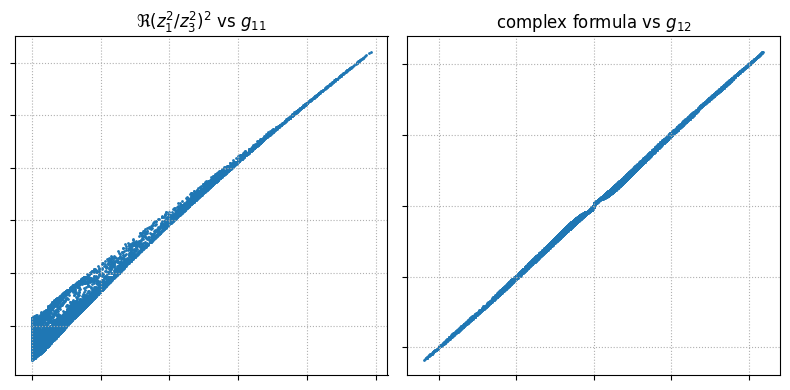

In [96]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,4))

ax1.scatter((1j * zs[:,1]**2).real**2,
            g[:,0,0].real, s=1)
ax1.set_title("$\\Re(z_1^2/z_3^2)^2$ vs $g_{11}$")
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.grid(linestyle=':')

ax2.scatter(((((((x6 * 1/(x8))) * x6) + (x8 * ((x4) * x4))) * -0.051611226) * x4),
            g[:,0,1].real, s=1)
ax2.set_title("complex formula vs $g_{12}$")
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.grid(linestyle=':')

fig.tight_layout()
fig.savefig('graphics/limiting.png', dpi=400)
